In [52]:
import pickle as pkl
with open("../resources/final_data.pickle","rb") as pkl_in:
    en_pt_data_pos = pkl.load(pkl_in)
    en_de_data_pos = pkl.load(pkl_in)
    en_pt_data = pkl.load(pkl_in)
    en_de_data = pkl.load(pkl_in)
    data = pkl.load(pkl_in)

In [3]:
import numpy as np

def simple_LR(df, split):
    y = df['y'].values
    del df['y']
    x = df.values
    #linear regressor doesn't take 3d input
    x = [[np.average(x[i][j]) for j in range(len(x[i]))] for i in range(len(x))]
    x = np.array(x)
    
    #train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = split)
    print('Size of Train Size : ', len(X_train))
    print('Size of Test Size :', len(X_test))
    
    #model fitting
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(X_train, y_train)

    yPrediction_Train = reg.predict(X_train)

    yPrediction_Test = reg.predict(X_test)
    
    #in case you are confused about score() like I was, here's a useful link : https://www.kaggle.com/getting-started/27261
    return y_train, y_test, yPrediction_Train, yPrediction_Test, reg.score(X_train, y_train), reg.score(X_test, y_test)

In [22]:
def xgb(df, split) :
    y = df['y'].values
    del df['y']
    x = df.values
    
    #xgb regressor doesn't take 3d input
    x = [[np.average(x[i][j]) for j in range(len(x[i]))] for i in range(len(x))]
    x = np.array(x)
    
    #train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = split)
    print('Size of Train Size : ', len(X_train))
    print('Size of Test Size :', len(X_test))
    
    #model fitting
    import xgboost as xgb
    model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
    model.fit(X_train, y_train)

    yPrediction_Train = model.predict(X_train)

    yPrediction_Test = model.predict(X_test)
    
    #in case you are confused about score() like I was, here's a useful link : https://www.kaggle.com/getting-started/27261
    return y_train, y_test, yPrediction_Train, yPrediction_Test, reg.score(X_train, y_train), reg.score(X_test, y_test) 

In [30]:
import pandas as pd

#model with 30 sentences as data size : baseline 1
y_train_enpt_pos, y_test_enpt_pos, ypred_train_enpt_pos, ypred_test_enpt_pos, score_train_enpt_pos, score_test_enpt_pos = simple_LR(pd.DataFrame(en_pt_data_pos).T[['lang1_fe_ft', 'lang1_fn_ft', 'lang2_fe_ft', 'lang2_fn_ft','y']], 0.33)
y_train_ende_pos, y_test_ende_pos, ypred_train_ende_pos, ypred_test_ende_pos, score_train_ende_pos, score_test_ende_pos = simple_LR(pd.DataFrame(en_de_data_pos).T[['lang1_fe_ft', 'lang1_fn_ft', 'lang2_fe_ft', 'lang2_fn_ft','y']], 0.33)
print(score_train_enpt_pos, score_test_enpt_pos)
print(score_train_ende_pos, score_test_ende_pos)


Size of Train Size :  20
Size of Test Size : 10
Size of Train Size :  20
Size of Test Size : 11
0.18178567592516737 0.0683103942633041
0.020987679444068208 -0.20941305565280377
Size of Train Size :  50
Size of Test Size : 10
Size of Train Size :  50
Size of Test Size : 10
0.026421812839864334 -0.0795747785344254
0.010805621273562549 -0.0830075364289049
Size of Train Size :  100
Size of Test Size : 20
0.0006518841983125245 -0.15973041523000364
Size of Train Size :  100
Size of Test Size : 20
0.008296769599178577 -0.1209782256061076


In [54]:
#model with 60/40 sentences as data size : baseline 2
y_train_enpt, y_test_enpt, ypred_train_enpt, ypred_test_enpt, score_train_enpt, score_test_enpt = simple_LR(pd.DataFrame(en_pt_data).T[['lang1_fe_ft', 'lang1_fn_ft', 'lang2_fe_ft', 'lang2_fn_ft','y']], 0.165)
y_train_ende, y_test_ende, ypred_train_ende, ypred_test_ende, score_train_ende, score_test_ende = simple_LR(pd.DataFrame(en_de_data).T[['lang1_fe_ft', 'lang1_fn_ft', 'lang2_fe_ft', 'lang2_fn_ft','y']], 0.165)
print(score_train_enpt, score_test_enpt)
print(score_train_ende, score_test_ende)

Size of Train Size :  33
Size of Test Size : 7
Size of Train Size :  34
Size of Test Size : 7
0.10534641426531144 0.16760088136516826
0.0683534360870921 -9.483877112201


In [55]:
#model with 120 sentences as data size - using simple linear regressor: baseline 3
#y_train, y_test, ypred_train, ypred_test, score_train, score_test = simple_LR(pd.DataFrame(data).T[['lang1_fe_ft', 'lang1_fn_ft', 'lang1_lu_ft', 'lang2_fe_ft', 'lang2_fn_ft', 'lang2_lu_ft','y']], 0.165)
y_train, y_test, ypred_train, ypred_test, score_train, score_test = simple_LR(pd.DataFrame(data).T[['lang1_fn_ft','lang1_sent_ft', 'lang2_fn_ft', 'lang2_sent_ft','y']], 0.165)
print(score_train, score_test)

Size of Train Size :  67
Size of Test Size : 14
0.05189572631307659 -0.3700638412615018


In [64]:
#model with 120 sentences as data size - using xgboost regressor :
#y_train_xgb, y_test_xgb, ypred_train_xgb, ypred_test_xgb, score_train_xgb, score_test_xgb = simple_LR(pd.DataFrame(data).T[['lang1_fe_ft', 'lang1_fn_ft', 'lang1_lu_ft', 'lang2_fe_ft', 'lang2_fn_ft', 'lang2_lu_ft','y']], 0.165)
y_train_xgb, y_test_xgb, ypred_train_xgb, ypred_test_xgb, score_train_xgb, score_test_xgb = simple_LR(pd.DataFrame(data).T[['lang1_fe_ft', 'lang1_fn_ft', 'lang1_sent_ft', 'lang2_fe_ft', 'lang2_fn_ft', 'lang2_sent_ft','y']], 0.165)

print(score_train_xgb, score_test_xgb)

Size of Train Size :  67
Size of Test Size : 14
0.09958140638835555 -0.10311292924455541


In [50]:
x = pd.DataFrame(data).T[['y']]
x.values

array([[0.8571428571428571],
       [0.7857142857142857],
       [0.7857142857142857],
       [0.8928571428571429],
       [1.0],
       [0.6785714285714286],
       [0.8214285714285714],
       [0.8214285714285714],
       [0.75],
       [0.75],
       [0.8928571428571429],
       [0.8571428571428571],
       [0.8571428571428571],
       [0.9642857142857143],
       [0.8571428571428571],
       [0.8571428571428571],
       [0.7142857142857143],
       [0.8214285714285714],
       [1.0],
       [0.6071428571428571],
       [0.9642857142857143],
       [0.9285714285714286],
       [0.8214285714285714],
       [0.9285714285714286],
       [0.8214285714285714],
       [0.9285714285714286],
       [0.9285714285714286],
       [0.9285714285714286],
       [0.8571428571428571],
       [0.8214285714285714],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
      

(array([20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  1.,  3.,
         0.,  5.,  7.,  8., 10.,  0.,  6.,  8.,  6.,  3.]),
 array([0.0, 0.027777777777777776, 0.05555555555555555,
        0.08333333333333333, 0.1111111111111111, 0.1388888888888889,
        0.16666666666666666, 0.19444444444444442, 0.2222222222222222, 0.25,
        0.2777777777777778, 0.3055555555555555, 0.3333333333333333,
        0.3611111111111111, 0.38888888888888884, 0.41666666666666663,
        0.4444444444444444, 0.4722222222222222, 0.5, 0.5277777777777778,
        0.5555555555555556, 0.5833333333333333, 0.611111111111111,
        0.6388888888888888, 0.6666666666666666, 0.6944444444444444,
        0.7222222222222222, 0.75, 0.7777777777777777, 0.8055555555555555,
        0.8333333333333333, 0.861111111111111, 0.8888888888888888,
        0.9166666666666666, 0.9444444444444444, 0.9722222222222222, 1.0],
       dtype=object),
 <a list o

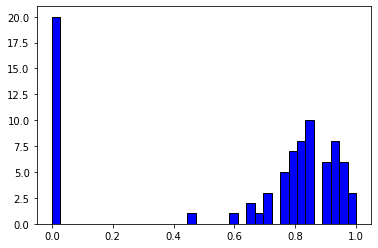

In [53]:
import matplotlib.pyplot as plt
plt.hist(pd.DataFrame(data).T[['y']].values, color = 'blue', edgecolor = 'black', bins = int(180/5))

In [10]:
pd.DataFrame(en_pt_data).T

,lang1_fe_ft,lang1_fe_lu_ft,lang1_fn_ft,lang1_lu_ft,lang1_total_ft,lang2_fe_ft,lang2_fe_lu_ft,lang2_fn_ft,lang2_lu_ft,lang2_total_ft,y
1008_en--737_pt,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.857143
1009_en--738_pt,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.785714
1010_en--739_pt,"[0.030593917, 0.03817722, 0.062578715, 0.03833...","[0.0037171647, -0.24187279, -0.08966686, -0.08...","[0.033119902, -0.00011051734, -0.0107294535, -...","[0.0315132, -0.044960085, -0.0064381044, 0.086...","[0.033119902, -0.00011051734, -0.0107294535, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.785714
1011_en--740_pt,"[0.009941753, 0.016596297, 0.04560777, 0.05863...","[-0.022285942689990252, 0.011062200318469852, ...","[-0.008575603, -0.01600944, 0.14536014, 0.0747...","[-0.032184225, -0.11527424, 0.07347378, 0.1616...","[-0.008575603, -0.01600944, 0.14536014, 0.0747...","[-0.054568034, -0.043999556, 0.08560609, 0.047...","[0.01993681610186199, -0.04915791019183794, 0....","[-0.015070310386975606, -0.02766117554356257, ...","[0.015320151, -0.027279781, 0.019877778, 0.026...","[-0.015070310386975606, -0.02766117554356257, ...",0.892857
1012_en--741_pt,"[0.027382206, 0.04711564, 0.057742387, 0.06212...","[0.0030313858, -0.1436925, -0.16985153, 0.0111...","[-0.008625011, 0.055906024, -0.029998438, 0.05...","[0.030957177, -0.0002431469, 0.031135127, 0.07...","[-0.008625011, 0.055906024, -0.029998438, 0.05...","[-0.009012645, -0.0049569, -0.011022557, 0.070...","[0.001207666666666666, -0.020786091666666666, ...","[-0.014601175, 0.0045553744, -0.031238303, 0.0...","[-0.036747249999999995, -0.007837125, -0.02273...","[-0.014601175, 0.0045553744, -0.031238303, 0.0...",1
1013_en--742_pt,"[-0.02333678, 0.028588517, 0.064130686, 0.0615...","[-0.027804204629499386, 0.03310491744912991, 0...","[0.0008851662635485334, 0.01709776575461328, 0...","[-0.008049217212688179, 0.025596046702419717, ...","[0.0008851662635485334, 0.01709776575461328, 0...","[-0.00013098354, 0.021606436, 0.031423256, 0.0...","[0.0083391327583721, -0.01603250748640519, 0.0...","[0.005349249978709221, 0.03244795632900521, 0....","[0.010625973143838967, -0.00027965114270647306...","[0.005349249978709221, 0.03244795632900521, 0....",0.678571
1014_en--743_pt,"[-0.0021628523, 0.015782226, 0.021099204, 0.01...","[-0.006555076436613296, -0.002910810456132727,...","[0.012735802564084532, 0.022609567078080827, -...","[-0.0090182945, 0.026460996, 0.0015098987, 0.0...","[0.012735802564084532, 0.022609567078080827, -...","[-0.01832983, 0.00554902, 0.03746627, 0.060631...","[0.011278279115198348, -0.008861419850525003, ...","[0.000775714737050642, 0.005165641618926722, -...","[-0.0076892073, -0.011481435, 0.037896328, 0.0...","[0.000775714737050642, 0.005165641618926722, -...",0.821429
1015_en--744_pt,"[-0.021862388, -0.02019102, 0.034911633,

In [6]:
pd.DataFrame(data).T[['lang1_fe_ft', 'lang1_fn_ft', 'lang1_lu_ft', 'lang1_sent_ft', 'lang2_fe_ft', 'lang2_fn_ft', 'lang2_lu_ft', 'lang2_sent_ft','y']]

,lang1_fe_ft,lang1_fn_ft,lang1_lu_ft,lang2_fe_ft,lang2_fn_ft,lang2_lu_ft,lang2_sent_ft,y
1008_en--737_pt,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.857143
1009_en--738_pt,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.785714
1010_en--739_pt,"[0.030593917, 0.03817722, 0.062578715, 0.03833...","[0.033119902, -0.00011051734, -0.0107294535, -...","[-0.09804574, -0.51568305, -0.22418302, 0.3193...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.18622391, -0.07438127, 0.040536113, 0.13783...",0.785714
1011_en--740_pt,"[0.009941753, 0.016596297, 0.04560777, 0.05863...","[-0.008575603, -0.01600944, 0.14536014, 0.0747...","[0.00022224337, -0.35716587, 0.064450875, -0.0...","[-0.054568034, -0.043999556, 0.08560609, 0.047...","[-0.015070310386975606, -0.02766117554356257, ...","[0.33165443, -0.068193056, 0.04553281, 0.25619...","[0.35614157, -0.056875188, 0.05986435, 0.33601...",0.892857
1012_en--741_pt,"[0.027382206, 0.04711564, 0.057742387, 0.06212...","[-0.008625011, 0.055906024, -0.029998438, 0.05...","[-0.14955397, -0.4005407, 0.28347528, -0.03999...","[-0.009012645, -0.0049569, -0.011022557, 0.070...","[-0.014601175, 0.0045553744, -0.031238303, 0.0...","[0.28657305, -0.36202148, 0.075065464, 0.10081...","[0.17397526, -0.33793837, 0.16070227, 0.190843...",1
1013_en--742_pt,"[-0.02333678, 0.028588517, 0.064130686, 0.0615...","[0.0008851662635485334, 0.01709776575461328, 0...","[-0.3967907, -0.36018744, 0.88635784, 0.089848...","[-0.00013098354, 0.021606436, 0.031423256, 0.0...","[0.005349249978709221, 0.03244795632900521, 0....","[-0.02845579362474382, -0.10341305378824472, 0...","[0.1502124, -0.10185929, 0.5973113, 0.11943988...",0.678571
1014_en--743_pt,"[-0.0021628523, 0.015782226, 0.021099204, 0.01...","[0.012735802564084532, 0.022609567078080827, -...","[-0.22301231, 0.018114304, 0.6113912, -0.13930...","[-0.01832983, 0.00554902, 0.03746627, 0.060631...","[0.000775714737050642, 0.005165641618926722, -...","[0.07004102996804497, 0.01302007111636075, 0.9...","[0.2442404, 0.101454444, 0.92827433, 0.0326377...",0.821429
1015_en--744_pt,"[-0.021862388, -0.02019102, 0.034911633, 0.043...","[0.08155654, 0.0021852814, -0.0034097228, -0.0...","[-0.092288144, -0.11766661, 0.5779224, -0.0651...","[0.007904414, 0.0022079535, 0.016012602, 0.043...","[0.015202475, 0.0137592405, 0.011530259, 0.016...","[0.28352466, -0.05541556, 0.71002173, -0.07525...","[0.2547094, -0.09236566, 0.58911824, -0.025488...",0.821429
1016_en--745_pt,"[-0.022985209, 0.007839752, 0.015854448, 0.061...","[-0.03387685266227246, 0.001512200101762563, 0...","[-0.32494906, -0.2304625, 0.006839621, 0.14546...","[0.003408716, 0.067123964, -0.009170389, 0.057...","[-0.028175009302033698, 0.00984991828243839, 0...","[0.05570680435214724, 0.0023935756513050626, 0...","[0.16520971, -0.066877335, 0.3769891, 0.296976...",0.75
1017_en--746_pt,"[-0.0054177237, 0.04083448, 0.009321969, 0.032...","[-0.029787820542820295, -0.0029902493883505465...","[-0.05621319, -0.36715785, -0.09574357, 0.1644...","[-0.014857039, 0.011232279, 0.0056794, 0.03351...","[-0.03255844618261655, -0.002108211450537046, ...","[-0.034882500767707825, -0.16946428517500559, ...","[0.10700095, -0.19640146, 0.39399597, 0.167108...",0.75


In [7]:
def scores(y_true, y_pred):
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_true, y_pred)    #mse
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))     #rmse
    
    return round(mse, 4), round(rmse, 4)

In [31]:
#model 1 scores
#En-Pt scores
mse_train_enpt_pos, rmse_train_enpt_pos = scores(y_train_enpt_pos, ypred_train_enpt_pos)
mse_test_enpt_pos, rmse_test_enpt_pos = scores(y_test_enpt_pos, ypred_test_enpt_pos)
print("En-Pt Results")
print("RMSE-train :", rmse_train_enpt_pos, "RMSE-test :", rmse_test_enpt_pos, "MSE-train :", mse_train_enpt_pos, "MSE-test :", mse_test_enpt_pos)

#En-De scores
mse_train_ende_pos, rmse_train_ende_pos = scores(y_train_ende_pos, ypred_train_ende_pos)
mse_test_ende_pos, rmse_test_ende_pos = scores(y_test_ende_pos, ypred_test_ende_pos)
print("En-De Results")
print("RMSE-train :", rmse_train_ende_pos, "RMSE-test :", rmse_test_ende_pos, "MSE-train :", mse_train_ende_pos, "MSE-test :", mse_test_ende_pos)

En-Pt Results
RMSE-train : 0.0892 RMSE-test : 0.068 MSE-train : 0.008 MSE-test : 0.0046
En-De Results
RMSE-train : 0.1252 RMSE-test : 0.0951 MSE-train : 0.0157 MSE-test : 0.0091


In [39]:
from sklearn.metrics import mean_squared_error
print(y_test_xgb, ypred_test_xgb)
mean_squared_error(y_test_xgb, ypred_test_xgb, multioutput='raw_values')  

[0.0 0.8214285714285714 0.0 0.0 0.9285714285714286 0.0 0.6428571428571429
 0.0 0.0 0.8928571428571429 0.0 0.7142857142857143 0.0 0.0 0.0 0.0
 0.9285714285714286 0.0 0.8571428571428571 0.6428571428571429] [0.46045023 0.44315002 0.43354627 0.40978447 0.46136002 0.44353091
 0.46900591 0.39453378 0.40192111 0.43312806 0.44181292 0.40120157
 0.48653667 0.44802051 0.45965144 0.49207884 0.45085574 0.45516522
 0.38616968 0.39228269]


array([0.17944231])

In [57]:
#model 2 scores
#En-Pt scores
mse_train_enpt, rmse_train_enpt = scores(y_train_enpt, ypred_train_enpt)
mse_test_enpt, rmse_test_enpt = scores(y_test_enpt, ypred_test_enpt)
print("En-Pt Results")
print("RMSE-train :", rmse_train_enpt, "RMSE-test :", rmse_test_enpt, "MSE-train :", mse_train_enpt, "MSE-test :", mse_test_enpt)

#En-De scores
mse_train_ende, rmse_train_ende = scores(y_train_ende, ypred_train_ende)
mse_test_ende, rmse_test_ende = scores(y_test_ende, ypred_test_ende)
print("En-De Results")
print("RMSE-train :", rmse_train_ende, "RMSE-test :", rmse_test_ende, "MSE-train :", mse_train_ende, "MSE-test :", mse_test_ende)

En-Pt Results
RMSE-train : 0.3541 RMSE-test : 0.3498 MSE-train : 0.1254 MSE-test : 0.1224
En-De Results
RMSE-train : 0.3772 RMSE-test : 0.3152 MSE-train : 0.1423 MSE-test : 0.0993


In [58]:
#model 3 scores
mse_train, rmse_train = scores(y_train, ypred_train)
mse_test, rmse_test = scores(y_test, ypred_test)
print("Model 2 Results")
print("RMSE-train :", rmse_train, "RMSE-test :", rmse_test, "MSE-train :", mse_train, "MSE-test :", mse_test)

Model 2 Results
RMSE-train : 0.3713 RMSE-test : 0.3626 MSE-train : 0.1379 MSE-test : 0.1315
Model 2 Results
RMSE-train-XGB : 0.3687 RMSE-test-XGB : 0.3678 MSE-train-XGB : 0.1359 MSE-test-XGB : 0.1353


In [65]:
#model 4 scores
mse_train_xgb, rmse_train_xgb = scores(y_train_xgb, ypred_train_xgb)
mse_test_xgb, rmse_test_xgb = scores(y_test_xgb, ypred_test_xgb)
print("Model 2 Results")
print("RMSE-train-XGB :", rmse_train_xgb, "RMSE-test-XGB :", rmse_test_xgb, "MSE-train-XGB :", mse_train_xgb, "MSE-test-XGB :", mse_test_xgb)
y_test_xgb, ypred_test_xgb

Model 2 Results
RMSE-train-XGB : 0.3638 RMSE-test-XGB : 0.3194 MSE-train-XGB : 0.1323 MSE-test-XGB : 0.102


(array([0.0, 0.8571428571428571, 0.0, 0.75, 0.8571428571428571,
        0.9642857142857143, 0.8571428571428571, 0.6071428571428571,
        0.8571428571428571, 0.7142857142857143, 0.9642857142857143,
        0.8214285714285714, 0.8214285714285714, 0.8928571428571429],
       dtype=object),
 array([0.66419536, 0.67861541, 0.7439336 , 0.71364844, 0.77993099,
        0.64349167, 0.70080226, 0.54630868, 0.6542181 , 0.64474899,
        0.69968867, 0.73461296, 0.49952705, 0.70297829]))